# AgentOps Langchain Agent Implementation

Using AgentOps monitoring with Langchain is simple. We've created a LangchainCallbackHandler that will do all of the heavy lifting!

First we'll import the typical Langchain packages:

In [ ]:
import os
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, AgentType
from langchain.agents import tool

The only difference with using AgentOps is that we'll also import this special Callback Handler

In [ ]:
from agentops.langchain_callback_handler import LangchainCallbackHandler as AgentOpsLangchainCallbackHandler

Next, we'll grab our two API keys. You can use dotenv like below or however else you like to load environment variables

In [ ]:
from dotenv import load_dotenv
load_dotenv()

This is where AgentOps comes into play. Before creating our LLM instance via Langchain, first we'll create an instance of the AO LangchainCallbackHandler. After the handler is initialized, a session will be recorded automatically.

Pass in your API key, and optionally any tags to describe this session for easier lookup in the AO dashboard.

In [ ]:
AGENTOPS_API_KEY = os.environ.get('AGENTOPS_API_KEY')
OPENAI_API_KEY = os.environ.get('OPENAI_API_KEY')

agentops_handler = AgentOpsLangchainCallbackHandler(api_key=AGENTOPS_API_KEY, tags=['Langchain Example'])

llm = ChatOpenAI(openai_api_key=OPENAI_API_KEY,
                 callbacks=[agentops_handler],
                 model='gpt-3.5-turbo')

You can also retrieve the `session_id` of the newly created session.

In [ ]:
print("Agent Ops session ID: " + str(agentops_handler.session_id))

Agents generally use tools. Let's define a simple tool here. Tool usage is also recorded.

In [ ]:
@tool
def find_movie(genre) -> str:
    """Find available movies"""
    if genre == 'drama':
        return 'Dune 2'
    else:
        return 'Pineapple Express'


tools = [find_movie]

For each tool, you need to also add the callback handler

In [ ]:
for t in tools:
    t.callbacks = [agentops_handler]

Finally, let's use our agent! Pass in the callback handler to the agent, and all the actions will be recorded in the AO Dashboard

In [ ]:
agent = initialize_agent(tools,
                         llm,
                         agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION,
                         verbose=True,
                         callbacks=[agentops_handler], # You must pass in a callback handler to record your agent
                         handle_parsing_errors=True)

In [ ]:
agent.run("What comedies are playing?", callbacks=[agentops_handler])

## Check your session
Finally, check your run on [AgentOps](https://app.agentops.ai)
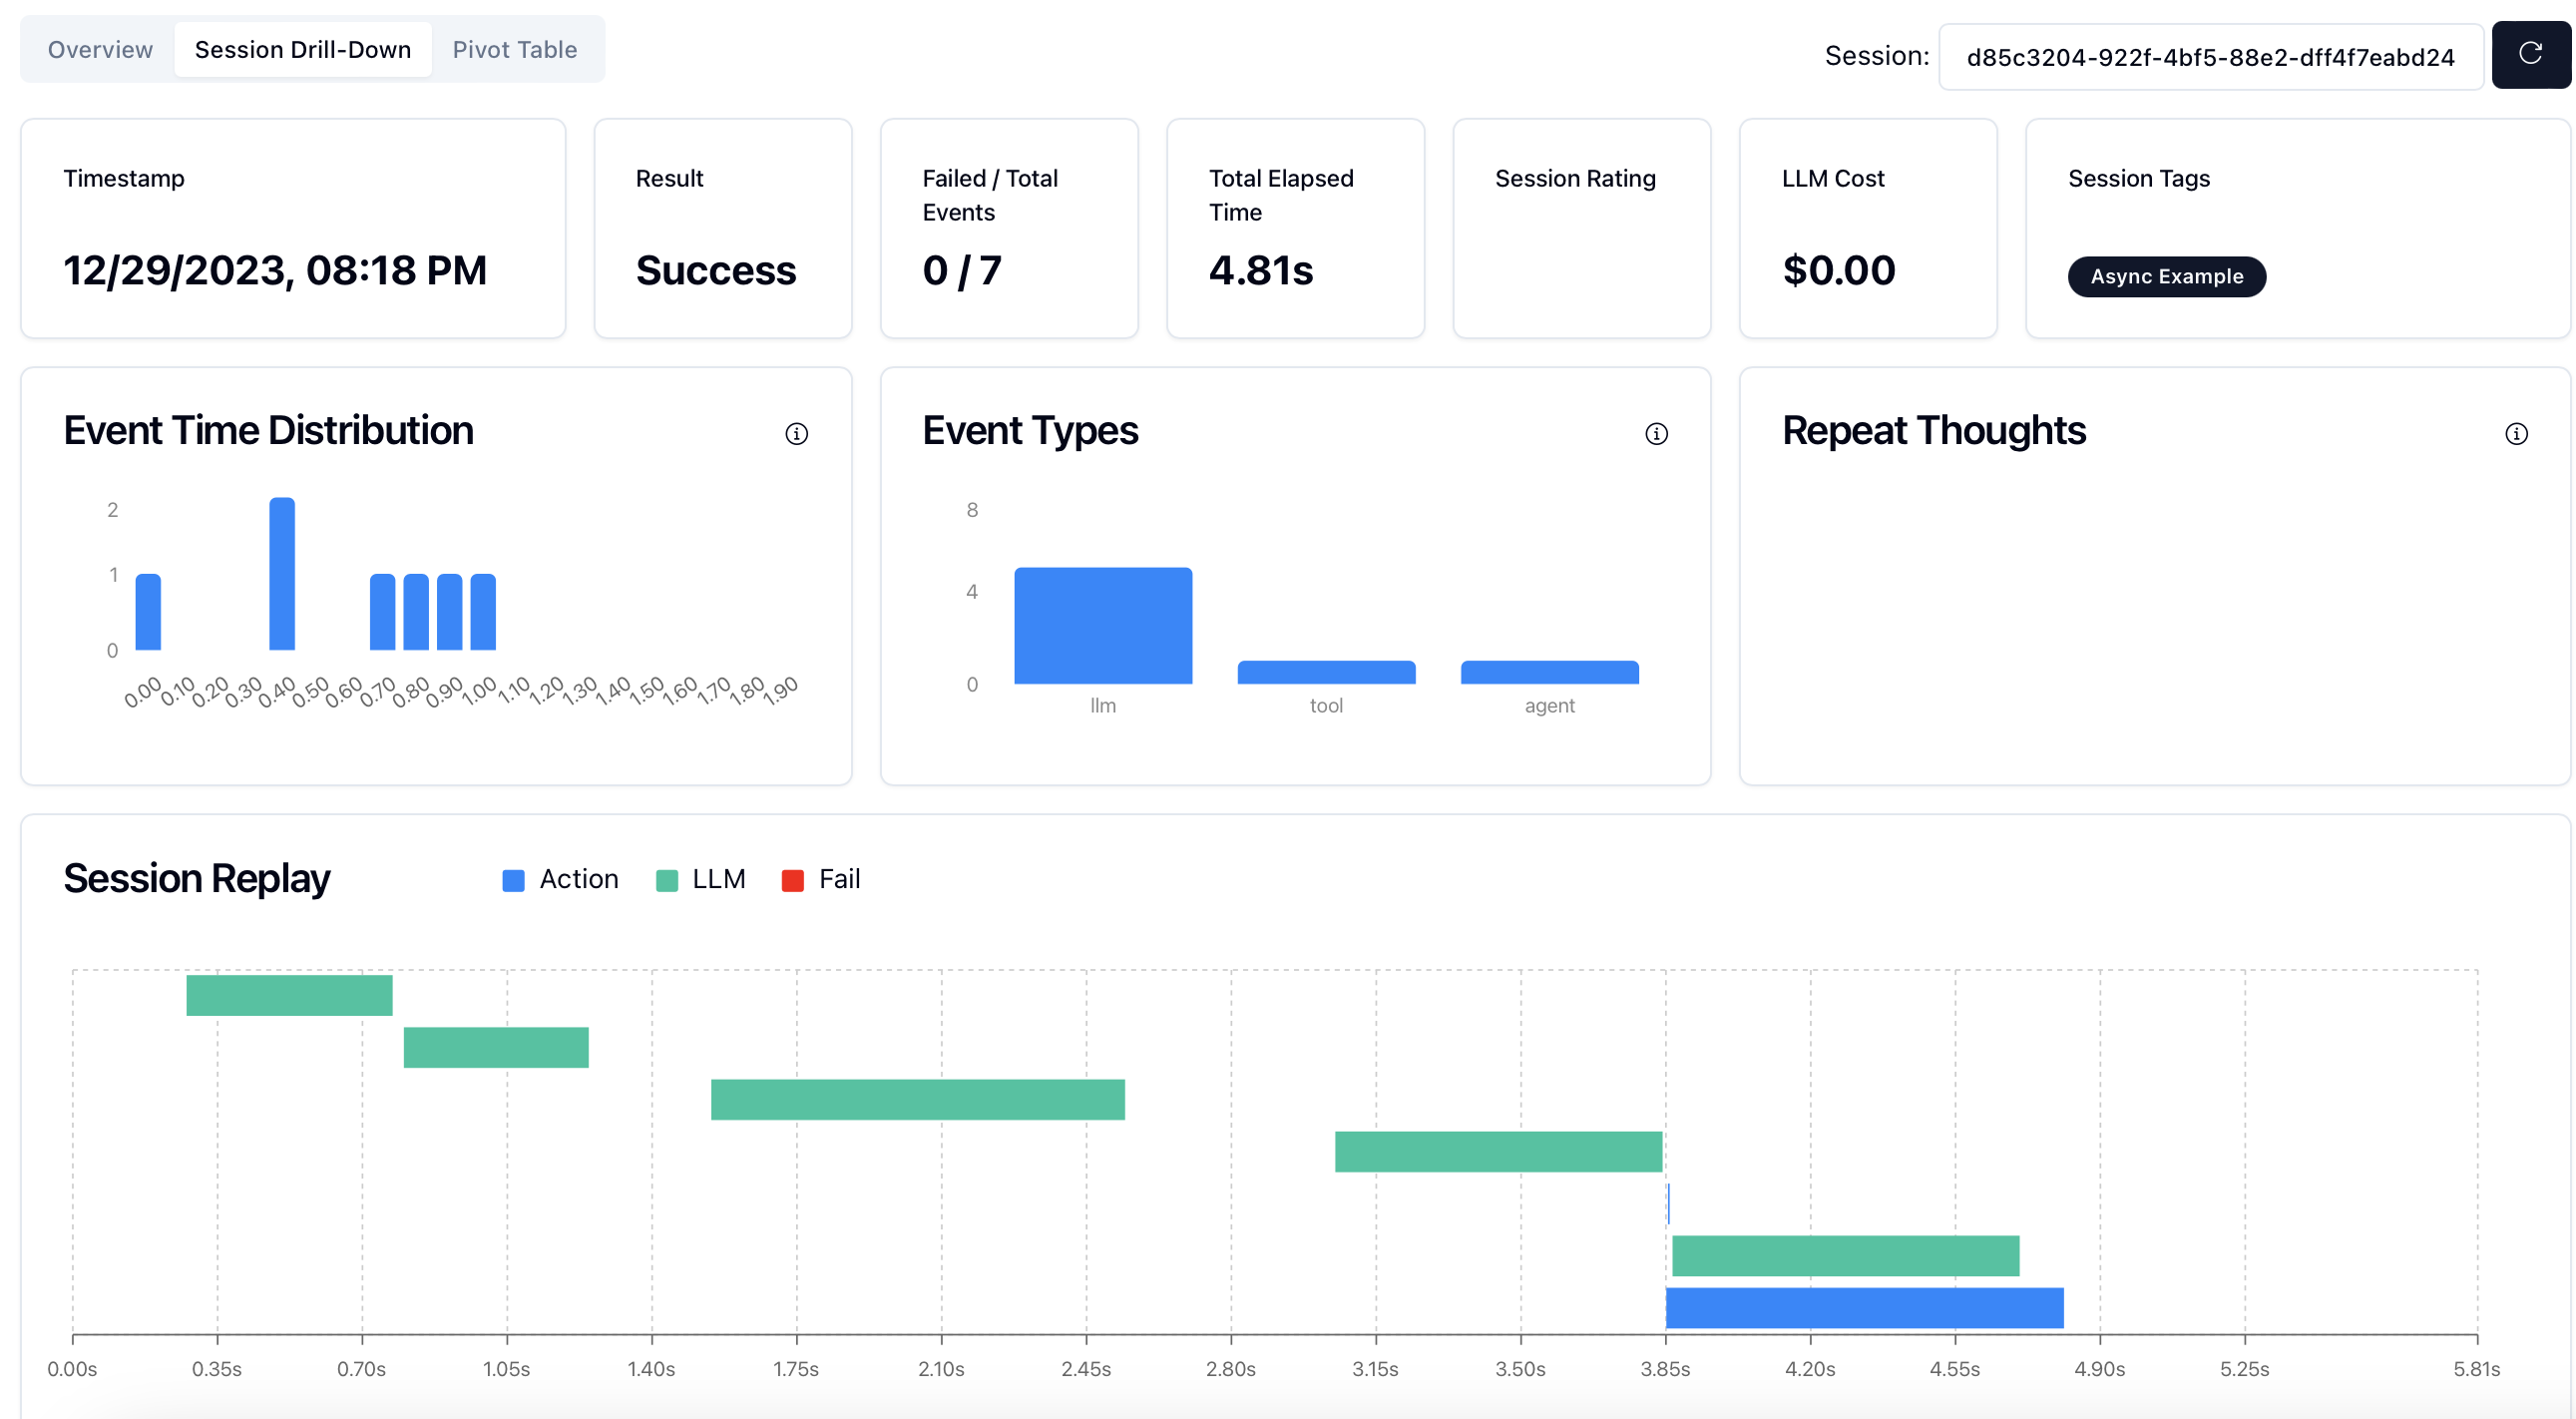

# Async Agents

Several langchain agents require async callback handlers. AgentOps also supports this.

In [ ]:
import os
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, AgentType
from langchain.agents import tool

In [ ]:
from agentops.langchain_callback_handler import AsyncLangchainCallbackHandler as AgentOpsAsyncLangchainCallbackHandler

In [ ]:
from dotenv import load_dotenv
load_dotenv()

AGENTOPS_API_KEY = os.environ.get('AGENTOPS_API_KEY')
OPENAI_API_KEY = os.environ.get('OPENAI_API_KEY')

In [ ]:
agentops_handler = AgentOpsAsyncLangchainCallbackHandler(api_key=AGENTOPS_API_KEY, tags=['Async Example'])

llm = ChatOpenAI(openai_api_key=OPENAI_API_KEY,
                 callbacks=[agentops_handler],
                 model='gpt-3.5-turbo')

print("Agent Ops session ID: " + str(await agentops_handler.session_id))

In [ ]:
@tool
def find_movie(genre) -> str:
    """Find available movies"""
    if genre == 'drama':
        return 'Dune 2'
    else:
        return 'Pineapple Express'


tools = [find_movie]

for t in tools:
    t.callbacks = [agentops_handler]

In [ ]:
agent = initialize_agent(
    tools,
    llm, 
    agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
    handle_parsing_errors=True,
    callbacks=[agentops_handler]
)

await agent.arun('What comedies are playing?')

## Check your session
Finally, check your run on [AgentOps](https://app.agentops.ai)

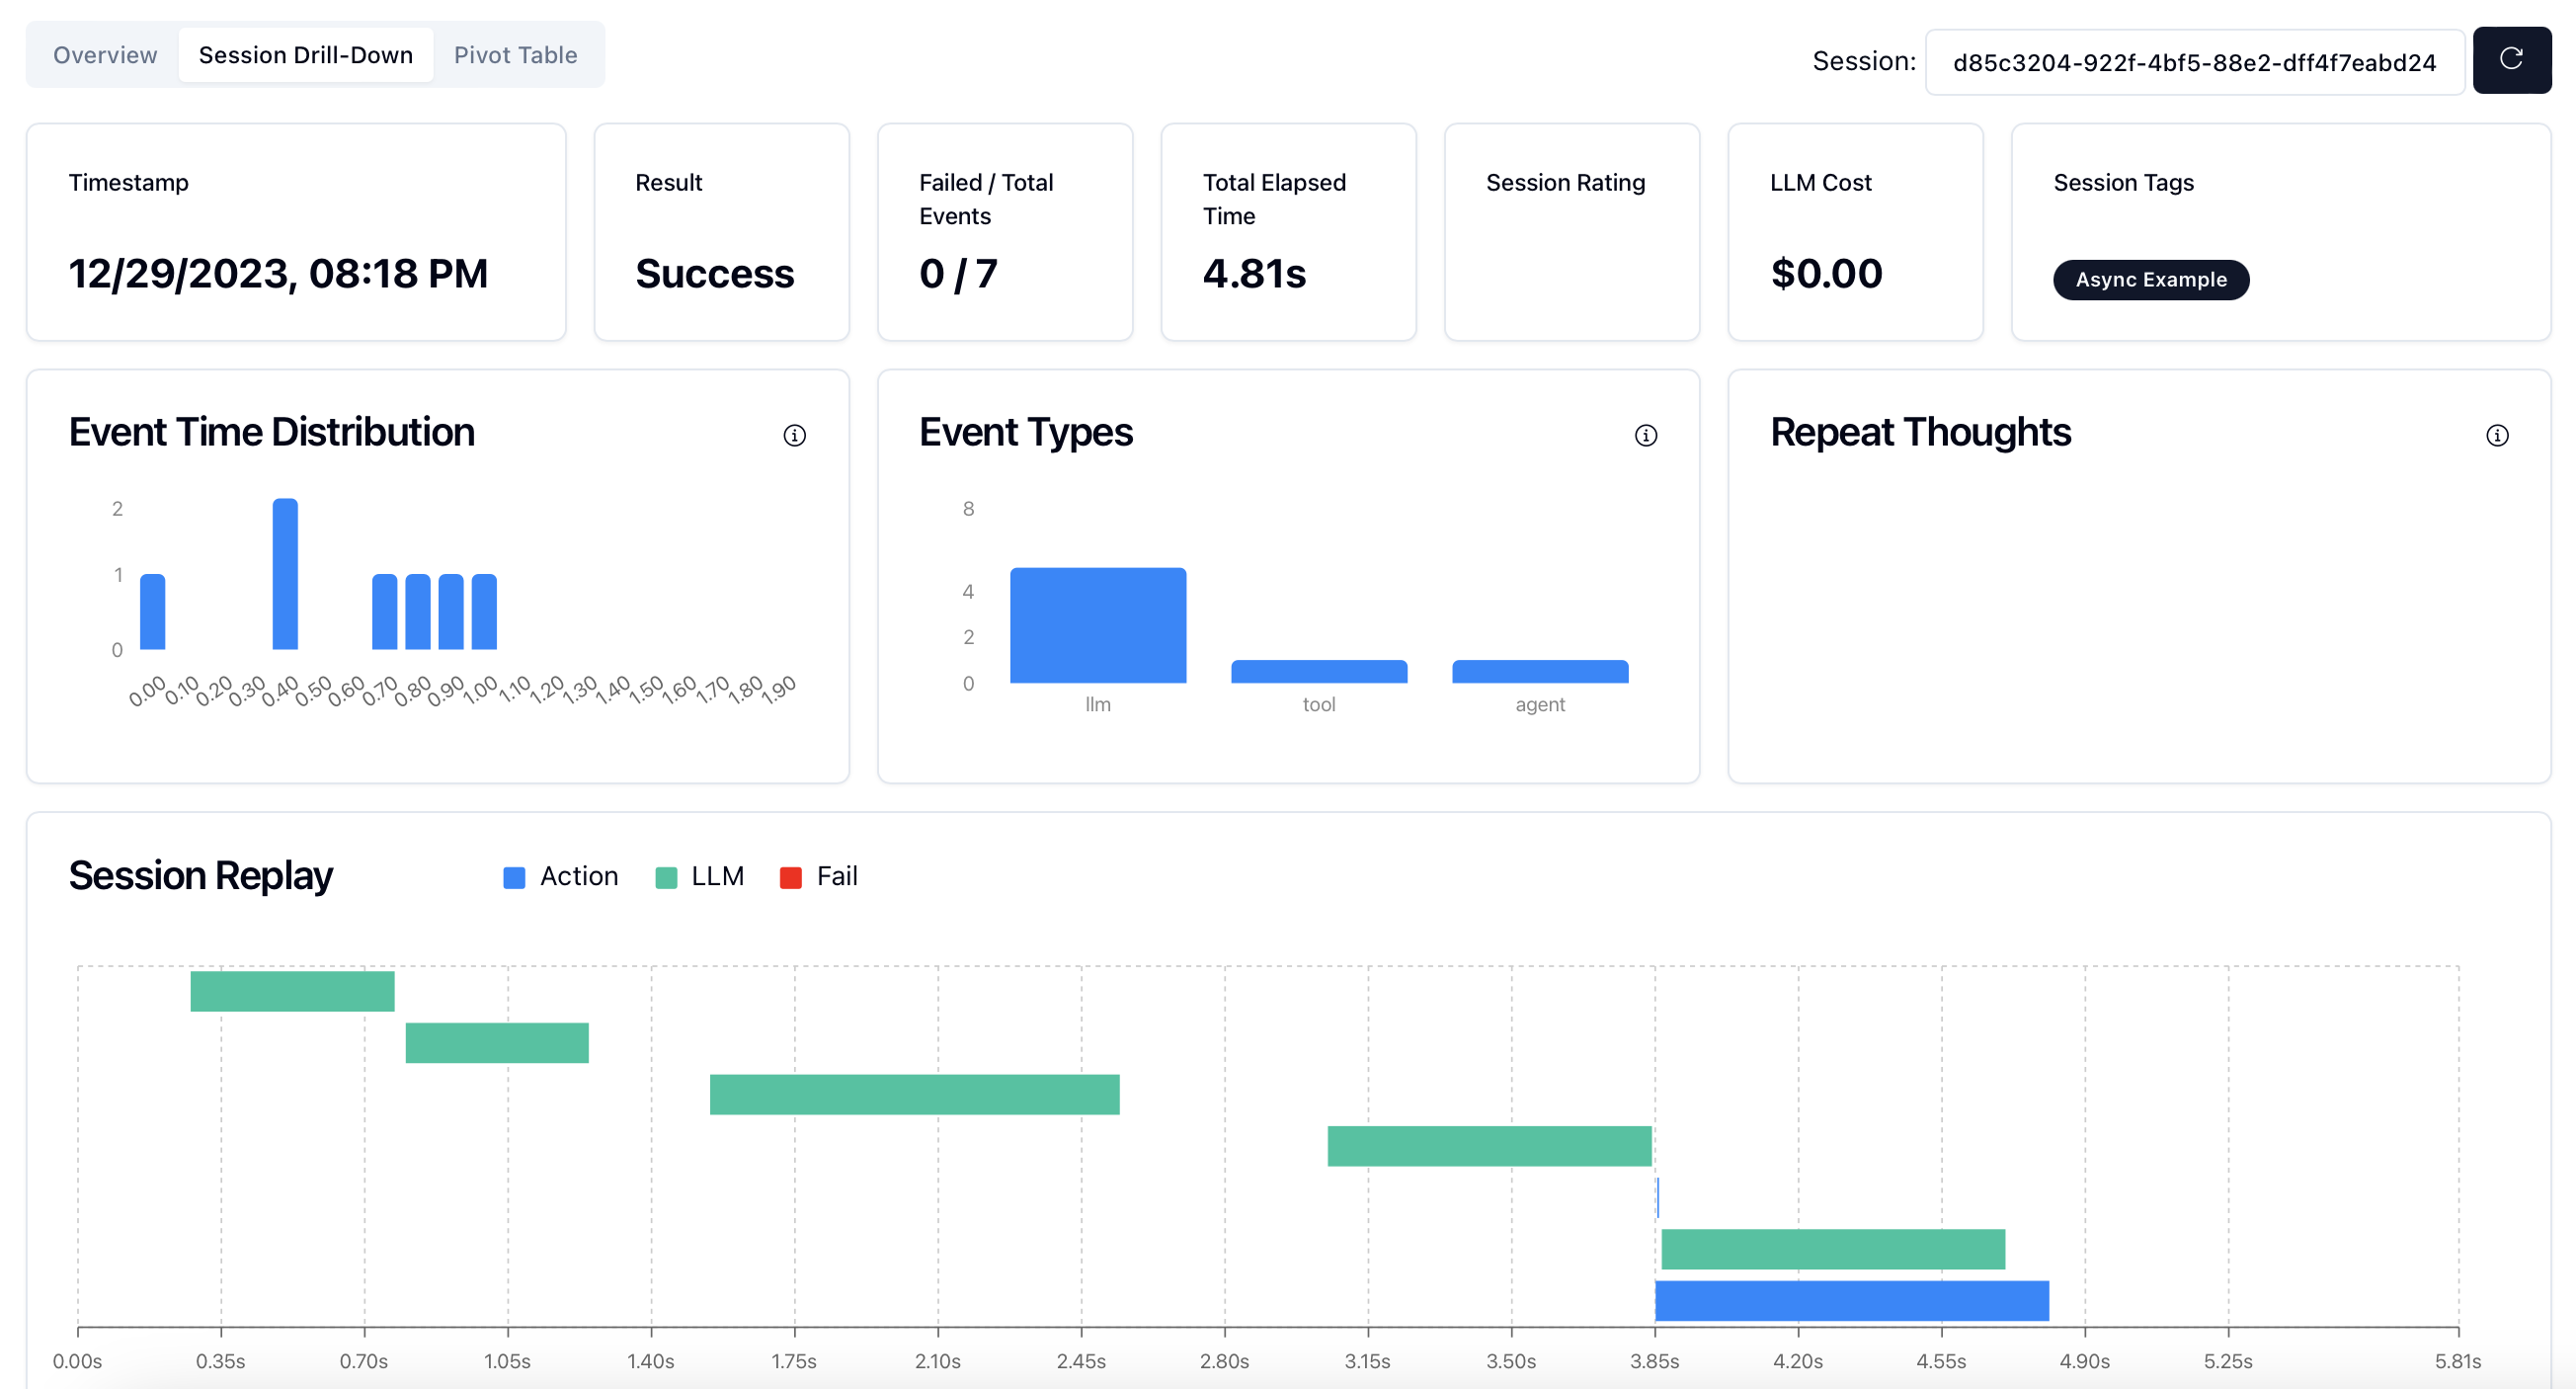